In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from ancestrator import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from itertools import product

source_labels = ['1000Genomes']
# samplegroup_labels = ['L', 'LE', 'LEA', 'LEAC', 'LEACI', 'NE', 'NA', 'EA']
samplegroup_labels = ['NE', 'NA', 'EA', 'L']
panel_labels = [
    "CPx1", "CPx10", "CPx100", "GAL_Completo", "GAL_Affy",
    'GAL_Affy_SubPanel_165','GAL_Affy_SubPanel_170','GAL_Affy_SubPanel_175',
    'GAL_Affy_SubPanel_150','GAL_Affy_SubPanel_155','GAL_Affy_SubPanel_160',
    'GAL_Affy_SubPanel_145','GAL_Affy_SubPanel_140','GAL_Affy_SubPanel_135',
    'GAL_Affy_SubPanel_130','GAL_Affy_SubPanel_125','GAL_Affy_SubPanel_120',
    'GAL_Affy_SubPanel_115','GAL_Affy_SubPanel_110','GAL_Affy_SubPanel_105',
    'GAL_Affy_SubPanel_100','GAL_Affy_SubPanel_95','GAL_Affy_SubPanel_90',
    'GAL_Affy_SubPanel_85','GAL_Affy_SubPanel_80','GAL_Affy_SubPanel_75',
    'GAL_Affy_SubPanel_70','GAL_Affy_SubPanel_65','GAL_Affy_SubPanel_60',
    'GAL_Affy_SubPanel_55','GAL_Affy_SubPanel_50','GAL_Affy_SubPanel_45',
    'GAL_Affy_SubPanel_40','GAL_Affy_SubPanel_35','GAL_Affy_SubPanel_30',
    'GAL_Affy_SubPanel_25','GAL_Affy_SubPanel_20','GAL_Affy_SubPanel_15',
    'GAL_Affy_SubPanel_10','GAL_Affy_SubPanel_5'
]

frames = []
combo = product(source_labels, panel_labels, samplegroup_labels)
for source_label, panel_label, samplegroup_label in combo:
    dataset = Dataset(source_label, samplegroup_label, panel_label)
    if dataset.samplegroup.label == 'L':
        df = dataset.fst('population')
        df['level'] = 'population'
    else:
        df = dataset.fst('region')
        df['level'] = 'region'
    df['samplegroup'] = dataset.samplegroup.label
    df['panel'] = panel_label
    frames.append(df)

fst = pd.concat(frames)

mean_fst = fst.groupby(['level', 'samplegroup', 'panel']).mean().unstack('panel')['Fst']
mean_fst = mean_fst[panel_labels]  # Sorts the columns
mean_fst.columns = [Panel(panel_label).name for panel_label in mean_fst.columns]

cum_fst = fst.groupby(['level', 'samplegroup', 'panel']).sum().unstack('panel')['Fst']
cum_fst = cum_fst[panel_labels]  # Sorts the columns
cum_fst.columns = [Panel(panel_label).name for panel_label in cum_fst.columns]

mean_fst

CPx1 · 438 SNPs  CPx10 · 4,424 SNPs  \
level      samplegroup                                        
population L                   0.018299            0.018825   
region     EA                  0.094607            0.091512   
           NA                  0.150843            0.152708   
           NE                  0.083451            0.086783   

                        CPx100 · 43,144 SNPs  GAL_Completo · 445 SNPs  \
level      samplegroup                                                  
population L                        0.018854                 0.104449   
region     EA                       0.091205                 0.471556   
           NA                       0.155176                 0.478561   
           NE                       0.086584                 0.421196   

                        GAL_Affy · 179 SNPs  GAL_Affy · SubPanel_165  \
level      samplegroup                                                 
population L                       0.099087                 0.103846   
region     EA                      0.513198                 0.496436   
           NA                      0.510129                 0.492148   
           NE                      0.380013                 0.412323   

                        GAL_Affy · SubPanel_170  GAL_Affy · SubPanel_175  \
level      samplegroup                                                     
population L                           0.102355                 0.100344   
region     EA                          0.502748                 0.508379   
           NA                          0.499123                 0.504848   
           NE                          0.400616                 0.389147   

                        GAL_Affy · SubPanel_150  GAL_Affy · SubPanel_155  \
level      samplegroup                                                     
population L                           0.110136                 0.108034   
region     EA                          0.477640                 0.483510   
           NA                          0.461456                 0.473002   
           NE                          0.448154                 0.436277   

                                ...            GAL_Affy · SubPanel_50  \
level      samplegroup          ...                                     
population L                    ...                          0.114965   
region     EA                   ...                          0.524618   
           NA                   ...                          0.540223   
           NE                   ...                          0.527168   

                        GAL_Affy · SubPanel_45  GAL_Affy · SubPanel_40  \
level      samplegroup                                                   
population L                          0.112341                0.111567   
region     EA                         0.539775                0.541054   
           NA                         0.525051                0.567238   
           NE                         0.538674                0.522863   

                        GAL_Affy · SubPanel_35  GAL_Affy · SubPanel_30  \
level      samplegroup                                                   
population L                          0.112769                0.113283   
region     EA                         0.548778                0.527017   
           NA                         0.540450                0.588418   
           NE                         0.540312                0.531404   

                        GAL_Affy · SubPanel_25  GAL_Affy · SubPanel_20  \
level      samplegroup                                                   
population L                          0.102639                0.105564   
region     EA                         0.540234                0.555791   
           NA                         0.618539                0.614495   
           NE                         0.512376                0.523919   

                        GAL_Affy · SubPanel_15  GAL_Affy · SubPanel_10  \
level      

# Crear subpaneles de GAL_Affy que balanceen el $F_{ST}$ de los 3 SampleGroups: NE NA EA

In [20]:

#     -- NOTE: Ya creé los subpaneles, no hace falta correr esto de nuevo. --


# def add_snp_to_new_panel(source_panel_fst, fst_column, new_panel_df):
#     top_snp_id = source_panel_fst[fst_column].idxmax()
#     top_snp_data = source_panel_fst.loc[top_snp_id]
#     new_panel_df = new_panel_df.append(top_snp_data)
#     source_panel_fst.drop(top_snp_id, inplace=True)
#     return new_panel_df

# desired_lengths = np.arange(5, 180, 5)
# subpanels = []

# for desired_length in desired_lengths:
#     # Prepare the source of AIMs
#     source_panel = Panel('GAL_Affy')
#     source_panel_fst = fst[(fst.panel == source_panel.label) & (fst.level == 'region')]
#     source_panel_fst = source_panel_fst[['Fst', 'samplegroup']].reset_index()
#     source_panel_fst = source_panel_fst.pivot_table(values='Fst', index='rs_id',
#                                                     columns='samplegroup')

#     new_panel_df = pd.DataFrame({})

#     # First AIM
#     new_panel_df = add_snp_to_new_panel(source_panel_fst, 'EA', new_panel_df)
    
#     # Rest of AIMs
#     for n in np.arange(desired_length - 1):
#         min_cum_fst = new_panel_df.sum().idxmin()
#         new_panel_df = add_snp_to_new_panel(source_panel_fst, min_cum_fst, new_panel_df)

#     # Create the panel and 'ALL' dataset files for '1000Genomes'
#     new_panel = source_panel.create_subpanel(new_panel_df.index, source_label='1000Genomes')
#     subpanels.append(new_panel)
#     print()

Written -> /home/juan/tesina/panel_info_files/GAL_Affy_SubPanel_5.bim
Written -> /home/juan/tesina/panel_info_files/GAL_Affy_SubPanel_5.snps
You can now call Panel('GAL_Affy_SubPanel_5')
You can now call Dataset('1000Genomes', 'ALL', 'GAL_Affy_SubPanel_5') with any SampleGroup

Written -> /home/juan/tesina/panel_info_files/GAL_Affy_SubPanel_10.bim
Written -> /home/juan/tesina/panel_info_files/GAL_Affy_SubPanel_10.snps
You can now call Panel('GAL_Affy_SubPanel_10')
You can now call Dataset('1000Genomes', 'ALL', 'GAL_Affy_SubPanel_10') with any SampleGroup

Written -> /home/juan/tesina/panel_info_files/GAL_Affy_SubPanel_15.bim
Written -> /home/juan/tesina/panel_info_files/GAL_Affy_SubPanel_15.snps
You can now call Panel('GAL_Affy_SubPanel_15')
You can now call Dataset('1000Genomes', 'ALL', 'GAL_Affy_SubPanel_15') with any SampleGroup

Written -> /home/juan/tesina/panel_info_files/GAL_Affy_SubPanel_20.bim
Written -> /home/juan/tesina/panel_info_files/GAL_Affy_SubPanel_20.snps
You can now 

# $F_{ST}$ Latinos (between populations) & LEA (between regions)

Fst promedio (todos los datasets)
/home/juan/tesina/charts/panel_analyses/fst_barchart__region


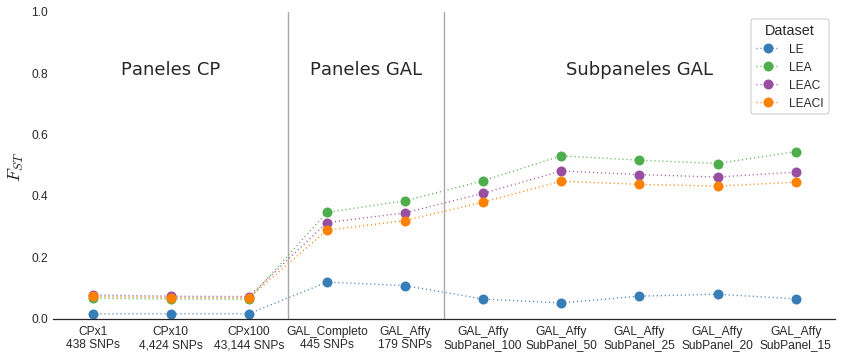

Fst promedio (todos los datasets)
/home/juan/tesina/charts/panel_analyses/fst_barchart__population


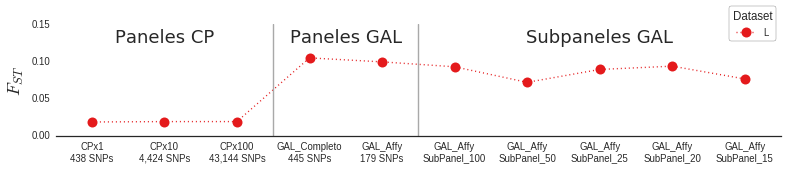

In [30]:
import numpy as np
from os.path import expanduser, join


fdir = expanduser("~/tesina/charts/panel_analyses")

sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns.set_style("white")

for level in ['region', 'population']:
    df = mean_fst.loc[level].copy()

    if level == 'population':
        color = sns.color_palette("Set1", 1)[0]
        sns.set_context("paper", font_scale=1.2)
        figsize = (13, 2)
    else:  
        color = sns.color_palette("Set1", 5)[1:]
        figsize = (14, 5.5)
        
    ax = df.T.plot(figsize=figsize, rot=0, color=color, linestyle="dotted",
                   marker="o", markersize=10) #, width=0.8) # kind="bar", 
    ax.set_ylabel("$F_{ST}$", fontsize=18, fontweight="bold")
    ax.legend(fancybox=True, loc="best", bbox_to_anchor=(1.01, .75),
              title="Datasets")

    # Annotate groups of panels
    ax.axvline(2.5, color="darkgray")
    ax.axvline(4.5, color="darkgray")
    text_yloc = 0.8 if level == 'region' else 0.125
    texts = [(1, text_yloc, "Paneles CP"),
             (3.5, text_yloc, "Paneles GAL"),
             (7, text_yloc, "Subpaneles GAL")]
    for params in texts:
        ax.text(*params, fontsize=18, horizontalalignment="center",
                family="monospace", fontname="Courier")

    if level == 'region':
        ax.set_ylim([0, 1])
        ygrid_points = np.linspace(0, 1, 6)
        ax.set_yticks(ygrid_points)
    else:
        ax.set_ylim([0, 0.15])
        ygrid_points = np.linspace(0, 0.15, 4)
        ax.set_yticks(ygrid_points)
        
    ax.set_xlim([-0.5, 9.5])
    ax.set_xticks(np.linspace(0, 9, 10))
    
    xticklabels = [l.get_text().replace(' · ', '\n') for l in ax.get_xticklabels()]
    ax.set_xticklabels(xticklabels, rotation=0)
    sns.despine(left=True)
    ax.xaxis.grid(False)

    handles, labels = ax.get_legend_handles_labels()
    if level == 'region':
        ax.legend(handles, labels, frameon=True, fancybox=True, title='Dataset')
    else:
        ax.legend(handles, labels, frameon=True, fancybox=True, title='Dataset',
                  bbox_to_anchor=(1, 1.2))

    caption = "Fst promedio (todos los datasets)"
    filepath = join(fdir, "fst_barchart__{}".format(level))
    plt.savefig(filepath, bbox_inches="tight")
    print(caption)
    print(filepath)
    plt.show()

In [55]:
df = mean_fst.loc['population'].T.applymap(lambda x: round(x, 3))
print(df)
print()
print(df.to_latex())

dataset                      L
CPx1 · 438 SNPs          0.018
CPx10 · 4,424 SNPs       0.019
CPx100 · 43,144 SNPs     0.019
GAL_Completo · 445 SNPs  0.104
GAL_Affy · 179 SNPs      0.099
GAL_Affy · SubPanel_100  0.092
GAL_Affy · SubPanel_50   0.072
GAL_Affy · SubPanel_25   0.089
GAL_Affy · SubPanel_20   0.093
GAL_Affy · SubPanel_15   0.076

\begin{tabular}{lr}
\toprule
dataset &      L \\
\midrule
CPx1 · 438 SNPs         &  0.018 \\
CPx10 · 4,424 SNPs      &  0.019 \\
CPx100 · 43,144 SNPs    &  0.019 \\
GAL\_Completo · 445 SNPs &  0.104 \\
GAL\_Affy · 179 SNPs     &  0.099 \\
GAL\_Affy · SubPanel\_100 &  0.092 \\
GAL\_Affy · SubPanel\_50  &  0.072 \\
GAL\_Affy · SubPanel\_25  &  0.089 \\
GAL\_Affy · SubPanel\_20  &  0.093 \\
GAL\_Affy · SubPanel\_15  &  0.076 \\
\bottomrule
\end{tabular}



# New $F_{ST}$ comparisons

* Crear tres nuevos SampleGroups: NE, NA, EA (producto de NAM, EUR, AFR), seleccionando como NAM a los peruanos y mexicanos ~100% americanos según el primer análisis de PCA/Admixture.

* Evaluar el $F_{ST}$ acumulado de cada panel (incluir los CPx!) con los nuevos datasets (o sea, cuánto diferencia cada panel entre Nativos vs Europeos, Nativos vs Africanos, Africanos vs Europeos). La idea de utilizar el Fst *acumulado* es que los paneles CPx van a tener un número mucho más alto y van a demostrar ser mejores que los GAL. En promedio, sin embargo, los GAL van a tener un Fst mucho más alto, por supuesto, porque no se mezclan los AIMs informativos con SNPs de origen ambiguo.

* En rigor, no sé si comparar a los paneles con el Fst promedio o el Fst acumulado. Supongo que este último?


Fst promedio (todos los datasets)
/home/juan/tesina/charts/panel_analyses/fst_barchart__region


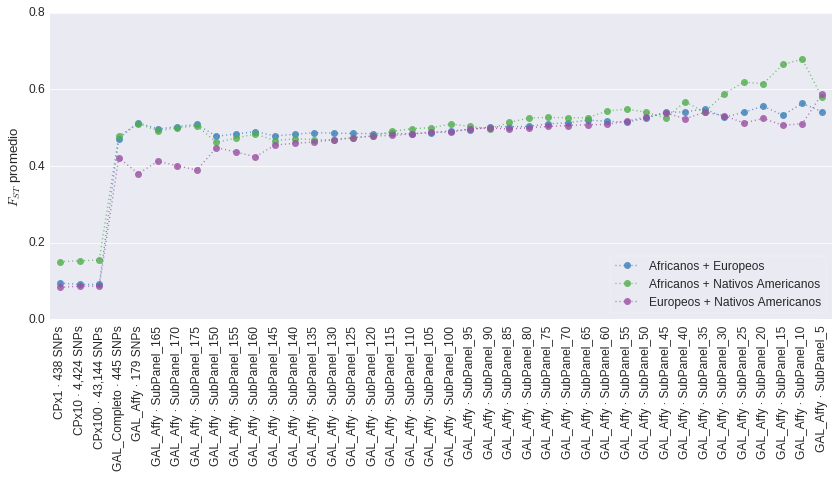

Fst promedio (todos los datasets)
/home/juan/tesina/charts/panel_analyses/fst_barchart__population


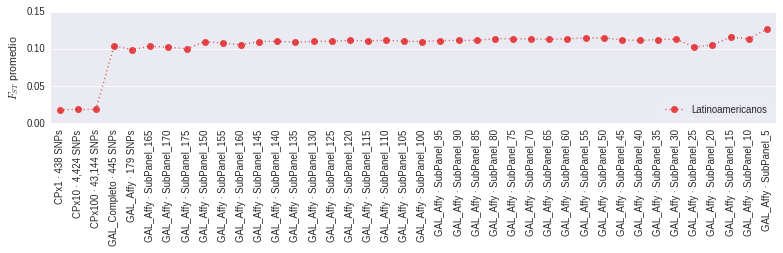

In [45]:
import numpy as np
from os.path import expanduser, join


fdir = expanduser("~/tesina/charts/panel_analyses")

sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns.set_style("darkgrid")

panels = mean_fst.columns

for level in ['region', 'population']:
    df = mean_fst.loc[level].copy()

    if level == 'population':
        color = sns.color_palette("Set1", 1)[0]
        sns.set_context("paper", font_scale=1.2)
        figsize = (13, 2)
    else:  
        color = sns.color_palette("Set1", len(df.columns))[1:]
        figsize = (14, 5.5)
    
    df = df.transpose()
    df.columns = [SampleGroup('1000Genomes', c).name for c in df.columns]
    ax = df.plot(figsize=figsize, rot=90, color=color, linestyle="dotted",
                   marker="o", markersize=7, alpha=0.8) #, width=0.8) # kind="bar", 
    ax.set_ylabel("$F_{ST}$ promedio")
    ax.legend(fancybox=True, loc="best", bbox_to_anchor=(1.01, .75),
              title="Datasets")

    # Annotate groups of panels
#     ax.axvline(2.5, color="darkgray")
#     ax.axvline(4.5, color="darkgray")
#     text_yloc = 0.8 if level == 'region' else 0.125
#     texts = [(1, text_yloc, "Paneles CP"),
#              (3.5, text_yloc, "Paneles GAL"),
#              (7, text_yloc, "Subpaneles GAL")]
#     for params in texts:
#         ax.text(*params, fontsize=18, horizontalalignment="center",
#                 family="monospace", fontname="Courier")

    if level == 'region':
        ax.set_ylim([0, .8])
        ygrid_points = np.linspace(0, .8, 5)
        ax.set_yticks(ygrid_points)
    else:
        ax.set_ylim([0, 0.15])
        ygrid_points = np.linspace(0, 0.15, 4)
        ax.set_yticks(ygrid_points)
        
    ax.set_xlim([-0.5, len(panels) - 0.5])

    ax.set_xticks(np.arange(len(panels)))
    ax.set_xticklabels(panels, rotation=90)
    sns.despine(left=True)
    ax.xaxis.grid(False)

    handles, labels = ax.get_legend_handles_labels()
    if level == 'region':
        ax.legend(handles, labels, frameon=True, fancybox=True, loc='lower right')
    else:
        ax.legend(handles, labels, frameon=True, fancybox=True, loc='lower right')

    caption = "Fst promedio (todos los datasets)"
    filepath = join(fdir, "fst_barchart__{}".format(level))
    plt.savefig(filepath, bbox_inches="tight")
    print(caption)
    print(filepath)
    plt.show()

Fst promedio (todos los datasets)
/home/juan/tesina/charts/panel_analyses/fst_barchart__region


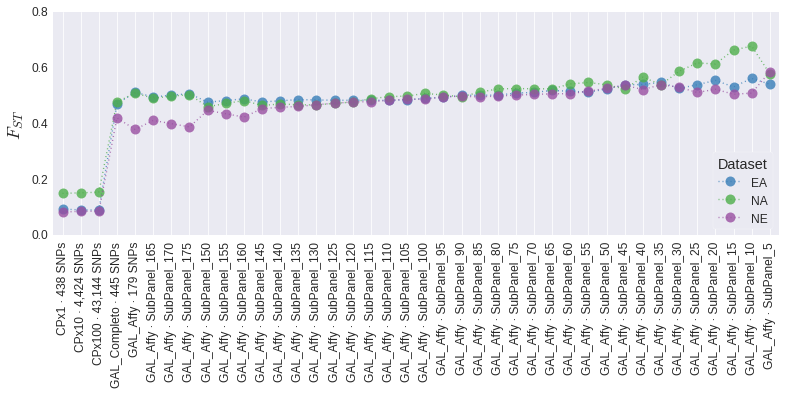

Fst promedio (todos los datasets)
/home/juan/tesina/charts/panel_analyses/fst_barchart__population


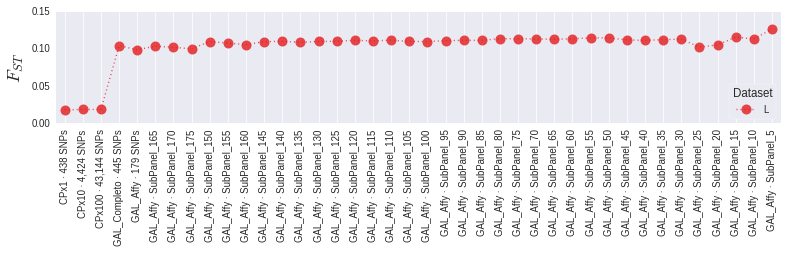

In [49]:
import numpy as np
from os.path import expanduser, join


fdir = expanduser("~/tesina/charts/panel_analyses")

sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns.set_style("darkgrid")

for level in ['region', 'population']:
    df = mean_fst.loc[level].copy()

    if level == 'population':
        color = sns.color_palette("Set1", 1)[0]
        sns.set_context("paper", font_scale=1.2)
        figsize = (13, 2)
    else:  
        color = sns.color_palette("Set1", 5)[1:]
        figsize = (13, 4)
        
    ax = df.T.plot(figsize=figsize, rot=90, color=color, linestyle="dotted",
                   marker="o", markersize=10, alpha=0.8) #, width=0.8) # kind="bar", 
    ax.set_ylabel("$F_{ST}$", fontsize=18, fontweight="bold")
    ax.legend(fancybox=True, loc="best", bbox_to_anchor=(1.01, .75),
              title="Datasets")

    # Annotate groups of panels
#     ax.axvline(2.5, color="darkgray")
#     ax.axvline(4.5, color="darkgray")
#     text_yloc = 0.8 if level == 'region' else 0.125
#     texts = [(1, text_yloc, "Paneles CP"),
#              (3.5, text_yloc, "Paneles GAL"),
#              (7, text_yloc, "Subpaneles GAL")]
#     for params in texts:
#         ax.text(*params, fontsize=18, horizontalalignment="center",
#                 family="monospace", fontname="Courier")

    if level == 'region':
        ax.set_ylim([0, .8])
        ygrid_points = np.linspace(0, .8, 5)
        ax.set_yticks(ygrid_points)
    else:
        ax.set_ylim([0, 0.15])
        ygrid_points = np.linspace(0, 0.15, 4)
        ax.set_yticks(ygrid_points)
        
    ax.set_xlim([-0.5, len(panels) - 0.5])

    ax.set_xticks(np.arange(len(panels)))
    ax.set_xticklabels(panels, rotation=90)
    sns.despine(left=True)
    ax.yaxis.grid(False)

    handles, labels = ax.get_legend_handles_labels()
    if level == 'region':
        ax.legend(handles, labels, frameon=True, fancybox=True, title='Dataset', loc='lower right')
    else:
        ax.legend(handles, labels, frameon=True, fancybox=True, title='Dataset', loc='lower right')

    caption = "Fst promedio (todos los datasets)"
    filepath = join(fdir, "fst_barchart__{}".format(level))
    plt.savefig(filepath, bbox_inches="tight")
    print(caption)
    print(filepath)
    plt.show()